<a href="https://colab.research.google.com/github/ashikshafi08/Kaggle_Competitions/blob/main/feedback_prize_essay/NBME_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/');

Mounted at /content/drive/


Have these files inside your file directory. 


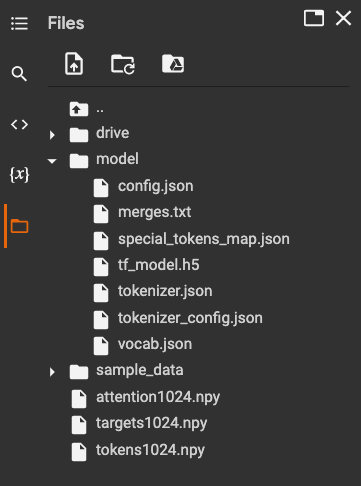

In [2]:
# Installing the hugging face library
!pip install transformers

     |████████████████████████████████| 3.5 MB 5.6 MB/s 
     |████████████████████████████████| 6.5 MB 42.2 MB/s 
     |████████████████████████████████| 895 kB 46.2 MB/s 
     |████████████████████████████████| 67 kB 5.4 MB/s 
     |████████████████████████████████| 596 kB 52.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
# Specifying the path for the data filees 

train_files_path = '/content/drive/MyDrive/Kaggle_Competition/feedback_prize_eval/train/'
test_files_path = '/content/drive/MyDrive/Kaggle_Competition/feedback_prize_eval/test/'
train_csv_path = '/content/drive/MyDrive/Kaggle_Competition/feedback_prize_eval/train.csv'

# Importing the libs we need 
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt
import tensorflow as tf
import transformers
#from transformers import *
from tensorflow.keras import layers 


# Veiwing the first few examples of the train dataframe

train_df = pd.read_csv(train_csv_path)
train_df.head(10)

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...
5,423A1CA112E2,1.622628e+12,887.0,1150.0,That's why there's a thing that's called no te...,Evidence,Evidence 3,163 164 165 166 167 168 169 170 171 172 173 17...
6,423A1CA112E2,1.622628e+12,1151.0,1533.0,Sometimes on the news there is either an accid...,Evidence,Evidence 4,211 212 213 214 215 216 217 218 219 220 221 22...
7,423A1CA112E2,1.622628e+12,1534.0,1602.0,Phones are fine to use and it's also the best ...,Claim,Claim 2,282 283 284 285 286 287 288 289 290 291 292 29...
8,423A1CA112E2,1.622628e+12,1603.0,1890.0,If you go through a problem and you can't find...,Evidence,Evidence 5,297 298 299 300 301 302 303 304 305 306 307 30...
9,423A1CA112E2,1.622628e+12,1891.0,2027.0,The news always updated when people do somethi...,Concluding Statement,Concluding Statement 1,355 356 357 358 359 360 361 362 363 364 365 36...


In [4]:
# Looking in to the firrst few examples of the train files and reading a random txt file 

import random 

random_path = train_files_path + random.choice(os.listdir(train_files_path))
file_ = open(random_path)
file_.readlines()



['To many peope it was confusing, but to me, it was life. Every night, I would come home exauhsted and tierd, but I knew I had to keep going in order to reach what I dreamed. Of course I put in a lot of labor, with barely any breaks, but if you think about it, its nothing compared to "the real deal" If you have a fear, at the end you will be over it and want to do that thing more often! When its over, it is something to be proud about and make sure that people know it! There is no reason not to talk about it and no reason not to brag, only because you worked so hard to get where you are now! If you want a chance to be able to say you did smething someone dreams of, its now!\n',
 '\n',
 "This is a one in a life time chance, and if you miss it up, you wil regret it! In some peoples mind, they think that Seagoing isnt usefull, but they are wrong. People also think that all we have to do is work, but thats not true, sometimes we get a chance to look at the beutiful views and feature take, 

#### Things that are about to be here, 
- We gonna use LongFormer as an backbone 
- Use a NER Formulation 
- one fold of cv 


Make changes that will convert this problem into a Question-Answering format and we can try with different backbones of the model. 

Since its an one fold it trains with 90% of the data and validates on 10% of the rest available data. 

Furthermore we can convert this thing into a K-Fold cross and train on 100% data with proper LB. 

To know more about LongFormer. (https://huggingface.co/docs/transformers/model_doc/longformer)

In a nutshell, 
- its similar to Roberta but can accept inputs as wide as 4096 tokens. 

In [5]:
# Initializing certain hyper parameters 


# Version for saving the model weights 
VER = 12 

# Load tokens from already trained model (or something like that)
#LOAD_TOKENS_FROM = ''

# If the variable sets to be None then we will download a tokenizer from the internet and also train a new model. 


# Downloading the model 
# If the downlaoded model path is none then create a new path and download the model in it 
DOWNLOADED_MODEL_PATH = None 
if DOWNLOADED_MODEL_PATH is None:
  DOWNLOADED_MODEL_PATH = 'model'

# Specifying the model name that has to be downloaded 
MODEL_NAME = 'allenai/longformer-base-4096'

# Imports that needed to be done in order to download the helper class from HuggingFace 
from transformers import AutoConfig, AutoTokenizer , TFAutoModel

# Download the model from hugging face 
if DOWNLOADED_MODEL_PATH == 'model':
  # make a dir with that name 
  os.mkdir('model')

  # Download the tokenizer for the longformer 
  tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
  # Saving it as pre-trained model to a folder 
  tokenizer.save_pretrained('model')

  # Downloading the configuration files for this transformer model 
  config = AutoConfig.from_pretrained(MODEL_NAME)
  # Saving it as a pretrained model 
  config.save_pretrained('model')

  # Creating a backbone for our TF Model (Input the model name and the config file)
  backbone = TFAutoModel.from_pretrained(MODEL_NAME , config = config)
  backbone.save_pretrained('model')




Downloading:   0%|          | 0.00/694 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/729M [00:00<?, ?B/s]

Some layers from the model checkpoint at allenai/longformer-base-4096 were not used when initializing TFLongformerModel: ['lm_head']
- This IS expected if you are initializing TFLongformerModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFLongformerModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFLongformerModel were initialized from the model checkpoint at allenai/longformer-base-4096.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFLongformerModel for predictions without further training.


The above saves the files

- TOKENIZER FILES - merges.txt, tokenizer_config.json, special_tokens_map.json, tokenizer.json, vocab.json
- CONFIG FILE - config.json
- MODEL WEIGHT FILE - tf_model.h5

In [6]:
# The train labels are 
print('Train Label are \n')
print(train_df.discourse_type.unique())

# Storing the unique ids 
ids = train_df.id.unique()
print(f'\n There are {len(ids)} train texts available in the train folder')

Train Label are 

['Lead' 'Position' 'Evidence' 'Claim' 'Concluding Statement'
 'Counterclaim' 'Rebuttal']

 There are 15594 train texts available in the train folder


#### Tokenize the train set 

Here we are convert our train data into NER token array that we can use to train a NER Transformer. We can easily convert this code into a Question Answer format by specifying which target belongs to which class. 

14 NER arrays to be 14 arrays of start position and end position for each of the 7 classes. 

In [7]:
# The max length of the sequence 
MAX_LEN = 1024 

# Tokens and Attention arrays 
train_tokens = np.zeros((len(ids) , MAX_LEN), dtype = 'int32') # tokens of each text with 1024 sequence length 
train_attention = np.zeros((len(ids) , MAX_LEN) , dtype = 'int32') 


# THE 14 CLASSES FOR NER
lead_b = np.zeros((len(ids),MAX_LEN))
lead_i = np.zeros((len(ids),MAX_LEN))

position_b = np.zeros((len(ids),MAX_LEN))
position_i = np.zeros((len(ids),MAX_LEN))

evidence_b = np.zeros((len(ids),MAX_LEN))
evidence_i = np.zeros((len(ids),MAX_LEN))

claim_b = np.zeros((len(ids),MAX_LEN))
claim_i = np.zeros((len(ids),MAX_LEN))

conclusion_b = np.zeros((len(ids),MAX_LEN))
conclusion_i = np.zeros((len(ids),MAX_LEN))

counterclaim_b = np.zeros((len(ids),MAX_LEN))
counterclaim_i = np.zeros((len(ids),MAX_LEN))

rebuttal_b = np.zeros((len(ids),MAX_LEN))
rebuttal_i = np.zeros((len(ids),MAX_LEN))

train_lens = [] # length of train 


# List of targets for b and i (start and end position)
targets_b = [lead_b, position_b, evidence_b, claim_b, conclusion_b, counterclaim_b, rebuttal_b]
targets_i = [lead_i, position_i, evidence_i, claim_i, conclusion_i, counterclaim_i, rebuttal_i]

# Mapping dictionary for the target class 
target_map = {'Lead':0, 'Position':1, 'Evidence':2, 'Claim':3, 'Concluding Statement':4,
             'Counterclaim':5, 'Rebuttal':6}


In [8]:
a = train_df.groupby('id')['discourse_start']
assert(np.sum(a.diff() <= 0) == 0) # Tru 
from tqdm import tqdm

In [9]:

# Looping through each training text available in our dir 
for id_num in tqdm(range(len(ids))):

  # If load tokens path available break this loop 
  #if LOAD_TOKENS_FROM: break 

  # If not do the below 
  if id_num % 100 == 0: 
    print(id_num, ', ', end = '')

  # Read the train txt file and tokenize it. Further save it in token arrays 
  n = ids[id_num]
  fname = f'{train_files_path}{n}.txt'
  
  # Opening the txt file and reading it 

  txt = open(fname , 'r').read()
  train_lens.append(len(txt.split()))
  
  # Tokenizing the text file 
  tokens = tokenizer.encode_plus(txt , max_length= MAX_LEN , padding = 'max_length' , 
                                 truncation = True , return_offsets_mapping = True)
  
  # Saving it inside the train tokens array 
  train_tokens[id_num , ] = tokens['input_ids']

  # Now storing the attention mask 
  train_attention[id_num , ] = tokens['attention_mask']

  # Find the targets in the text and save it in target arrays 
  offsets = tokens['offset_mapping'] # has the start and stop mappings 
  offset_index = 0
  df = train_df.loc[train_df.id == n] # n id equals to the id's in the df, loc the entire df with that id 
  for index , row in df.iterrows():
    # Start 
    a = row.discourse_start 
    b = row.discourse_end 

    # If the offset_index greater than total length of the offset mappings (1024) then break the loop
    if offset_index > len(offsets) - 1:
      break

    # Unpacking the tuple 
    c = offsets[offset_index][0]
    d = offsets[offset_index][1]

    beginning = True

    while b>c:
      if (c >=a) & (b>=d):
        k = target_map[row.discourse_type]
        
        if beginning:
          targets_b[k][id_num][offset_index] = 1 
          beginning = False 
        else:
          targets_i[k][id_num][offset_index] = 1

      offset_index += 1 
      
      if offset_index > len(offsets) - 1:
        break 

      c = offsets[offset_index][0]
      d = offsets[offset_index][1]

  0%|          | 0/15594 [00:00<?, ?it/s]

0 , 

  1%|          | 100/15594 [00:26<1:08:47,  3.75it/s]

100 , 

  1%|▏         | 209/15594 [03:18<10:45, 23.83it/s]

200 , 

  2%|▏         | 308/15594 [03:20<04:57, 51.45it/s]

300 , 

  3%|▎         | 410/15594 [03:22<04:52, 51.94it/s]

400 , 

  3%|▎         | 507/15594 [03:24<04:35, 54.86it/s]

500 , 

  4%|▍         | 609/15594 [03:26<04:54, 50.80it/s]

600 , 

  5%|▍         | 705/15594 [03:27<04:38, 53.47it/s]

700 , 

  5%|▌         | 806/15594 [03:29<04:46, 51.54it/s]

800 , 

  6%|▌         | 908/15594 [03:31<04:53, 49.97it/s]

900 , 

  6%|▋         | 1006/15594 [03:33<05:16, 46.06it/s]

1000 , 

  7%|▋         | 1106/15594 [03:35<04:48, 50.17it/s]

1100 , 

  8%|▊         | 1208/15594 [03:37<04:50, 49.47it/s]

1200 , 

  8%|▊         | 1310/15594 [03:39<04:38, 51.23it/s]

1300 , 

  9%|▉         | 1405/15594 [03:41<04:42, 50.20it/s]

1400 , 

 10%|▉         | 1507/15594 [03:43<04:37, 50.76it/s]

1500 , 

 10%|█         | 1606/15594 [03:45<04:43, 49.34it/s]

1600 , 

 11%|█         | 1709/15594 [03:47<04:57, 46.70it/s]

1700 , 

 12%|█▏        | 1806/15594 [03:50<05:21, 42.94it/s]

1800 , 

 12%|█▏        | 1909/15594 [03:52<05:06, 44.59it/s]

1900 , 

 13%|█▎        | 2007/15594 [03:54<04:55, 45.95it/s]

2000 , 

 13%|█▎        | 2105/15594 [03:56<04:58, 45.13it/s]

2100 , 

 14%|█▍        | 2206/15594 [03:58<05:01, 44.45it/s]

2200 , 

 15%|█▍        | 2305/15594 [04:00<04:51, 45.60it/s]

2300 , 

 15%|█▌        | 2405/15594 [04:03<04:58, 44.19it/s]

2400 , 

 16%|█▌        | 2505/15594 [04:05<05:07, 42.62it/s]

2500 , 

 17%|█▋        | 2606/15594 [04:07<03:49, 56.65it/s]

2600 , 

 17%|█▋        | 2706/15594 [04:09<03:44, 57.30it/s]

2700 , 

 18%|█▊        | 2806/15594 [04:10<03:47, 56.12it/s]

2800 , 

 19%|█▊        | 2909/15594 [04:12<03:43, 56.66it/s]

2900 , 

 19%|█▉        | 3007/15594 [04:14<03:49, 54.75it/s]

3000 , 

 20%|█▉        | 3106/15594 [04:16<03:37, 57.29it/s]

3100 , 

 21%|██        | 3208/15594 [04:18<03:35, 57.57it/s]

3200 , 

 21%|██        | 3307/15594 [04:20<04:05, 50.08it/s]

3300 , 

 22%|██▏       | 3409/15594 [04:22<03:53, 52.10it/s]

3400 , 

 22%|██▏       | 3508/15594 [04:24<04:01, 50.09it/s]

3500 , 

 23%|██▎       | 3608/15594 [04:26<04:00, 49.89it/s]

3600 , 

 24%|██▍       | 3706/15594 [04:28<03:54, 50.78it/s]

3700 , 

 24%|██▍       | 3808/15594 [04:30<03:51, 50.93it/s]

3800 , 

 25%|██▌       | 3908/15594 [04:32<03:54, 49.83it/s]

3900 , 

 26%|██▌       | 4008/15594 [04:34<04:00, 48.17it/s]

4000 , 

 26%|██▋       | 4109/15594 [04:36<03:36, 53.05it/s]

4100 , 

 27%|██▋       | 4207/15594 [04:38<03:49, 49.58it/s]

4200 , 

 28%|██▊       | 4311/15594 [04:39<03:20, 56.16it/s]

4300 , 

 28%|██▊       | 4407/15594 [04:41<03:32, 52.54it/s]

4400 , 

 29%|██▉       | 4509/15594 [04:43<03:24, 54.20it/s]

4500 , 

 30%|██▉       | 4606/15594 [04:45<03:36, 50.84it/s]

4600 , 

 30%|███       | 4709/15594 [04:47<03:22, 53.67it/s]

4700 , 

 31%|███       | 4806/15594 [04:49<03:21, 53.49it/s]

4800 , 

 31%|███▏      | 4909/15594 [04:51<03:21, 52.98it/s]

4900 , 

 32%|███▏      | 5007/15594 [04:52<03:17, 53.69it/s]

5000 , 

 33%|███▎      | 5106/15594 [04:54<03:26, 50.82it/s]

5100 , 

 33%|███▎      | 5209/15594 [04:56<03:06, 55.55it/s]

5200 , 

 34%|███▍      | 5307/15594 [04:58<03:05, 55.48it/s]

5300 , 

 35%|███▍      | 5409/15594 [05:00<03:07, 54.25it/s]

5400 , 

 35%|███▌      | 5509/15594 [05:01<03:00, 55.85it/s]

5500 , 

 36%|███▌      | 5608/15594 [05:03<02:52, 57.76it/s]

5600 , 

 37%|███▋      | 5711/15594 [05:05<02:54, 56.70it/s]

5700 , 

 37%|███▋      | 5807/15594 [05:07<03:02, 53.51it/s]

5800 , 

 38%|███▊      | 5909/15594 [05:09<03:04, 52.56it/s]

5900 , 

 39%|███▊      | 6006/15594 [05:11<02:56, 54.33it/s]

6000 , 

 39%|███▉      | 6110/15594 [05:13<02:57, 53.37it/s]

6100 , 

 40%|███▉      | 6207/15594 [05:14<02:53, 54.21it/s]

6200 , 

 40%|████      | 6309/15594 [05:16<02:50, 54.61it/s]

6300 , 

 41%|████      | 6406/15594 [05:18<02:54, 52.51it/s]

6400 , 

 42%|████▏     | 6510/15594 [05:20<02:44, 55.15it/s]

6500 , 

 42%|████▏     | 6610/15594 [05:22<02:35, 57.86it/s]

6600 , 

 43%|████▎     | 6707/15594 [05:24<02:43, 54.51it/s]

6700 , 

 44%|████▎     | 6810/15594 [05:25<02:46, 52.68it/s]

6800 , 

 44%|████▍     | 6906/15594 [05:27<02:35, 55.72it/s]

6900 , 

 45%|████▍     | 7010/15594 [05:29<02:25, 59.06it/s]

7000 , 

 46%|████▌     | 7107/15594 [05:31<02:25, 58.52it/s]

7100 , 

 46%|████▌     | 7209/15594 [05:32<02:19, 60.00it/s]

7200 , 

 47%|████▋     | 7311/15594 [05:34<02:16, 60.58it/s]

7300 , 

 47%|████▋     | 7407/15594 [05:36<02:20, 58.31it/s]

7400 , 

 48%|████▊     | 7509/15594 [05:38<02:17, 58.60it/s]

7500 , 

 49%|████▉     | 7610/15594 [05:39<02:12, 60.20it/s]

7600 , 

 49%|████▉     | 7710/15594 [05:41<02:11, 59.89it/s]

7700 , 

 50%|█████     | 7809/15594 [05:43<02:14, 57.75it/s]

7800 , 

 51%|█████     | 7911/15594 [05:44<02:07, 60.49it/s]

7900 , 

 51%|█████▏    | 8009/15594 [05:46<02:12, 57.15it/s]

8000 , 

 52%|█████▏    | 8106/15594 [05:48<02:08, 58.27it/s]

8100 , 

 53%|█████▎    | 8210/15594 [05:49<02:08, 57.27it/s]

8200 , 

 53%|█████▎    | 8306/15594 [05:51<01:58, 61.35it/s]

8300 , 

 54%|█████▍    | 8409/15594 [05:53<02:00, 59.56it/s]

8400 , 

 55%|█████▍    | 8510/15594 [05:55<02:02, 57.84it/s]

8500 , 

 55%|█████▌    | 8607/15594 [05:56<02:20, 49.82it/s]

8600 , 

 56%|█████▌    | 8707/15594 [05:58<02:05, 54.83it/s]

8700 , 

 56%|█████▋    | 8809/15594 [06:00<02:05, 54.17it/s]

8800 , 

 57%|█████▋    | 8905/15594 [06:02<02:05, 53.10it/s]

8900 , 

 58%|█████▊    | 9007/15594 [06:04<02:10, 50.44it/s]

9000 , 

 58%|█████▊    | 9105/15594 [06:06<02:01, 53.32it/s]

9100 , 

 59%|█████▉    | 9208/15594 [06:08<01:55, 55.26it/s]

9200 , 

 60%|█████▉    | 9304/15594 [06:10<01:59, 52.85it/s]

9300 , 

 60%|██████    | 9406/15594 [06:12<01:56, 53.27it/s]

9400 , 

 61%|██████    | 9508/15594 [06:14<01:55, 52.90it/s]

9500 , 

 62%|██████▏   | 9610/15594 [06:16<01:56, 51.50it/s]

9600 , 

 62%|██████▏   | 9706/15594 [06:18<01:52, 52.16it/s]

9700 , 

 63%|██████▎   | 9809/15594 [06:20<01:48, 53.17it/s]

9800 , 

 64%|██████▎   | 9905/15594 [06:21<01:50, 51.63it/s]

9900 , 

 64%|██████▍   | 10008/15594 [06:23<01:45, 52.71it/s]

10000 , 

 65%|██████▍   | 10111/15594 [06:25<01:45, 52.20it/s]

10100 , 

 65%|██████▌   | 10207/15594 [06:27<01:40, 53.73it/s]

10200 , 

 66%|██████▌   | 10309/15594 [06:29<01:47, 49.17it/s]

10300 , 

 67%|██████▋   | 10404/15594 [06:31<01:38, 52.86it/s]

10400 , 

 67%|██████▋   | 10507/15594 [06:33<01:35, 53.12it/s]

10500 , 

 68%|██████▊   | 10609/15594 [06:35<01:35, 52.39it/s]

10600 , 

 69%|██████▊   | 10705/15594 [06:37<01:36, 50.44it/s]

10700 , 

 69%|██████▉   | 10808/15594 [06:39<01:28, 54.10it/s]

10800 , 

 70%|██████▉   | 10910/15594 [06:41<01:27, 53.73it/s]

10900 , 

 71%|███████   | 11005/15594 [06:42<01:35, 48.03it/s]

11000 , 

 71%|███████   | 11107/15594 [06:44<01:26, 52.07it/s]

11100 , 

 72%|███████▏  | 11205/15594 [06:46<01:22, 53.08it/s]

11200 , 

 73%|███████▎  | 11308/15594 [06:48<01:20, 53.00it/s]

11300 , 

 73%|███████▎  | 11410/15594 [06:50<01:19, 52.76it/s]

11400 , 

 74%|███████▍  | 11506/15594 [06:52<01:14, 54.87it/s]

11500 , 

 74%|███████▍  | 11608/15594 [06:54<01:14, 53.69it/s]

11600 , 

 75%|███████▌  | 11710/15594 [06:56<01:14, 52.09it/s]

11700 , 

 76%|███████▌  | 11808/15594 [06:58<01:07, 55.90it/s]

11800 , 

 76%|███████▋  | 11912/15594 [06:59<01:04, 56.90it/s]

11900 , 

 77%|███████▋  | 12006/15594 [07:01<01:03, 56.75it/s]

12000 , 

 78%|███████▊  | 12108/15594 [07:03<00:59, 58.21it/s]

12100 , 

 78%|███████▊  | 12205/15594 [07:05<00:59, 56.55it/s]

12200 , 

 79%|███████▉  | 12311/15594 [07:06<00:56, 57.89it/s]

12300 , 

 80%|███████▉  | 12408/15594 [07:08<00:57, 55.65it/s]

12400 , 

 80%|████████  | 12505/15594 [07:10<00:56, 54.97it/s]

12500 , 

 81%|████████  | 12604/15594 [07:12<01:06, 44.74it/s]

12600 , 

 81%|████████▏ | 12705/15594 [07:14<01:06, 43.26it/s]

12700 , 

 82%|████████▏ | 12806/15594 [07:16<01:01, 45.06it/s]

12800 , 

 83%|████████▎ | 12904/15594 [07:19<00:58, 46.15it/s]

12900 , 

 83%|████████▎ | 13007/15594 [07:21<00:56, 45.80it/s]

13000 , 

 84%|████████▍ | 13107/15594 [07:23<00:55, 44.63it/s]

13100 , 

 85%|████████▍ | 13208/15594 [07:25<00:52, 45.04it/s]

13200 , 

 85%|████████▌ | 13307/15594 [07:27<00:48, 46.84it/s]

13300 , 

 86%|████████▌ | 13407/15594 [07:30<00:49, 44.03it/s]

13400 , 

 87%|████████▋ | 13508/15594 [07:32<00:46, 45.27it/s]

13500 , 

 87%|████████▋ | 13606/15594 [07:34<00:44, 44.50it/s]

13600 , 

 88%|████████▊ | 13705/15594 [07:36<00:40, 47.12it/s]

13700 , 

 89%|████████▊ | 13806/15594 [07:38<00:39, 45.61it/s]

13800 , 

 89%|████████▉ | 13908/15594 [07:41<00:39, 42.82it/s]

13900 , 

 90%|████████▉ | 14007/15594 [07:43<00:34, 45.63it/s]

14000 , 

 90%|█████████ | 14106/15594 [07:45<00:29, 50.52it/s]

14100 , 

 91%|█████████ | 14210/15594 [07:47<00:26, 52.21it/s]

14200 , 

 92%|█████████▏| 14308/15594 [07:49<00:25, 51.09it/s]

14300 , 

 92%|█████████▏| 14409/15594 [07:51<00:23, 51.13it/s]

14400 , 

 93%|█████████▎| 14504/15594 [07:53<00:21, 51.55it/s]

14500 , 

 94%|█████████▎| 14606/15594 [07:55<00:19, 49.77it/s]

14600 , 

 94%|█████████▍| 14709/15594 [07:57<00:17, 51.02it/s]

14700 , 

 95%|█████████▍| 14808/15594 [07:59<00:16, 48.85it/s]

14800 , 

 96%|█████████▌| 14909/15594 [08:01<00:13, 50.33it/s]

14900 , 

 96%|█████████▌| 15008/15594 [08:03<00:11, 50.67it/s]

15000 , 

 97%|█████████▋| 15104/15594 [08:05<00:09, 49.66it/s]

15100 , 

 97%|█████████▋| 15204/15594 [08:07<00:08, 47.62it/s]

15200 , 

 98%|█████████▊| 15307/15594 [08:09<00:05, 50.57it/s]

15300 , 

 99%|█████████▉| 15407/15594 [08:11<00:03, 49.95it/s]

15400 , 

 99%|█████████▉| 15508/15594 [08:13<00:01, 49.78it/s]

15500 , 

100%|██████████| 15594/15594 [08:15<00:00, 31.49it/s]


In [10]:
a,b,c,d

(4935.0, 5825.0, 0, 0)

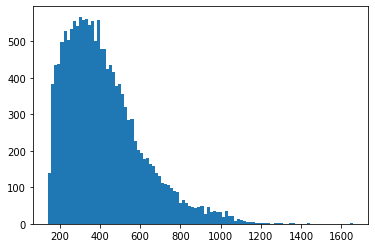

In [11]:
# Looking into the train lenghts of the txt files 
plt.hist(train_lens , bins = 100)
plt.show()

We have tokenized our text within the length 1024 and we could prolly explore other widths between 512 and 1024 also. 

Using the smaller stride breaks a single text into multiple chunks. Also using larger seq len leads to larger model. 

In [12]:
# Creating the targets 
targets = np.zeros((len(ids) , MAX_LEN , 15) , dtype = 'int32')
#targets.shape

for k in range(7):
  targets[: , : , 2*k] = targets_b[k] # start token
  targets[: , : , 2*k+1] = targets_i[k] # every other token 

targets[: , : , 14] = 1-np.max(targets , axis = -1)

targets.shape

(15594, 1024, 15)

Before the targets were full of zeros and we know updated the targets array with our start and rest of the span tokens. 

In [13]:
# Decoding the input tokens back to text 
tokenizer.decode(random.choice(train_tokens))

'<s>What if you were doing a extracurricular activity and wanted to share the joy of it with everyone else? I do agree that students should participate in at least one extracurricular activity. Having a extracurricular activity helps students become more social, more active, and provides people with information that is not taught in school.\n\nA extra curricular activity can allow people to become more sociable and make more friends. This is possible because there are probably other people who want to join the same clubs as other peers. People in the same club can then become friends with people that have the same interests that they do. For example, say you join a sports team. You must be able to work well with them in order to win games, therefore you must socialize with your other teammates and become friends with them.\n\nStudents can also become more active in exercising, school, the environment, and the community. Ways to become more active in exercising is by joining a sports te

In [14]:
# Looking into the targets 
targets

array([[[0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1]],

       [[0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1]],

       [[0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1]],

       ...,

       [[1, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1]],

       [[1, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [15]:
# Storing all the variables 
np.save(f'targets{MAX_LEN}' , targets)
np.save(f'tokens{MAX_LEN}' , train_tokens)
np.save(f'attention{MAX_LEN}' , train_attention)
print('Saved NER Tokens')

Saved NER Tokens


In [16]:
# Move the tokens into a folder

# !mv -t /content/drive/MyDrive/Kaggle_Competition/feedback_prize_eval/ner_tokens  /content/attention1024.npy /content/targets1024.npy /content/tokens1024.npy


# Perhaps we can load this using the below code 
# file_name =  np.load(filepath)

### Building a model 

- Will use longformer as a backbone 
- Add our NER head using one hidden layer of size `228`
- One final layer with a softmax 

We use 15 classes in here because we split our labels into 14 classes, 
- `B` class 7 labels
- `I` class 7 labels
- additional class called `0` class that doesn't belong to any of the 14 classes. 

In [17]:
# Building a model 

def build_model():

  # Input layer for our tokens and attention masks
  tokens = layers.Input(shape = (MAX_LEN , ) , name = 'tokens' , dtype = tf.int32)
  attention = layers.Input(shape = (MAX_LEN ,) , name = 'attention', dtype = tf.int32)

  # Downloading the Configuration file for the pretained model 
  config = AutoConfig.from_pretrained('model' + '/config.json')

  # Initiating the backbone of the longformer 
  backbone = TFAutoModel.from_pretrained('model' + '/tf_model.h5' , config = config)

  # Passing the tokens and attention into the backbone 
  x = backbone(tokens , attention_mask = attention)

  # Only pass the x[0]
  
  # Dense layer and output layer 
  x = layers.Dense(256 , activation = 'relu')(x[0])
  x = layers.Dense(15 , activation = 'softmax' )(x)

  # Packing into a model 
  model = tf.keras.Model(inputs = [tokens , attention] , outputs = x)

  # Compiling the model 
  model.compile(optimizer = tf.keras.optimizers.Adam(lr = 1e-4) , 
                loss = tf.keras.losses.CategoricalCrossentropy() , 
                metrics = [tf.keras.metrics.CategoricalAccuracy()])
  
  return model



In [18]:
strategy = tf.distribute.get_strategy()
with strategy.scope():
  model = build_model()


# Model summary 
model.summary()

All model checkpoint layers were used when initializing TFLongformerModel.

All the layers of TFLongformerModel were initialized from the model checkpoint at model/tf_model.h5.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFLongformerModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 tokens (InputLayer)            [(None, 1024)]       0           []                               
                                                                                                  
 attention (InputLayer)         [(None, 1024)]       0           []                               
                                                                                                  
 tf_longformer_model_1 (TFLongf  TFLongformerBaseMod  148659456  ['tokens[0][0]',                 
 ormerModel)                    elOutputWithPooling               'attention[0][0]']              
                                (last_hidden_state=                                               
                                (None, 1024, 768),                                            

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### Training the model 

- Train for 5 epochs 
- Batch size 32 
- Learning rate is 1e4 for the first four epochs and 1e5 for the last / final epoch. 


Train valid split will be 90 and 10 % respectively. 

In [19]:
# Train and valid split 
np.random.seed(42)

train_idx = np.random.choice(np.arange(len(ids)) , int (0.9 * len(ids)) , replace = False)
valid_idx = np.setdiff1d(np.arange(len(ids)) , train_idx)

print(f'Train size : {len(train_idx)} , Valid size : {len(valid_idx)}')

Train size : 14034 , Valid size : 1560


In [20]:
# Learning rate scheduler and the checkpoints for training 
NUM_EPOCHS = 10

LRS = [1e-4 , 1e-4 , 1e-4 , 1e-4 , 1e-5 , 1e-5 , 1e-5 , 1e-3 , 1e-3 , 1e-3 ] 

def learning_rate_fn(epoch):
  return LRS[epoch] # return for each epoch 

lr_callback = tf.keras.callbacks.LearningRateScheduler(learning_rate_fn , verbose = True)


In [21]:
# Train the model 
history = model.fit(x = [train_tokens[train_idx ,] , train_attention[train_idx]] , 
                    y = targets[train_idx,] , 
                    validation_data = ([train_tokens[valid_idx ,] , train_attention[valid_idx ,]] , 
                                       targets[valid_idx,]), 
                    callbacks = [lr_callback] , 
                    epochs = NUM_EPOCHS , 
                    batch_size = 4 , 
                    verbose = 2)

# Save the model weights 
model.save_weights(f'long_v_epochs_10.h5')


Epoch 1: LearningRateScheduler setting learning rate to 0.0001.
Epoch 1/10


ResourceExhaustedError: ignored